In [67]:
import numpy as np
from itertools import compress

In [68]:
class Vertex:
    """
        Helper class representing single vertex in class Graph. Not recommended to use independently.
        
        Params:
            self.label - vertex label,
            self.ind - vertex reference key.
    """
    
    def __init__(self, label, ind):
        """
            Class object initiation. Takes two arguments: label and key, where ind must be of type int,
            and label cannot be of type Vertex.
        """
        
        assert type(ind) == int
        if type(label) == Vertex:
            raise TypeError('Vertex label cannot be of type Vertex')
        
        self.label = label
        self.ind = ind
        
    def __eq__(self, other):
        """
            Override of equality operator between to objects of class Vertex.
            Returns True if objects have same label and reference key, and False otherwise.
        """
        
        return (self.label, self.ind) == (other.label, other.ind)
    
    def __repr__(self):
        """
            Override of print method for object of class Vertex. Returns string of vertex label.
        """
        
        return str(self.label)

In [69]:
class Graph:
    """
        Class representing an undirected graph structure. 
        
        Params:
            self.veritces - vertex list,
            self.vertLabels - vertex labels,
            self.vertKeys - vertex reference keys,
            self.edges - edge list,
            self.type - graph type (weighted/unweighted).
    """
    
    def __init__(self, gtype = 'Unweighted'): 
        """
            Class object initiation. Takes one optional argument, gtype, denoting if the graph should be weighted or not 
            ('Unweighted' by default, can be set as 'Weighted').
        """
        
        self.vertices = []
        self.vertLabels = []
        self.vertKeys = []
        self.edges = []
        self.type = gtype
    
    def addVertex(self, vert):
        """
            Adds new vertex to the graph. Takes one argument, vert (cannot be of type Vertex), being the vertex label.
            Function automatically creates object of type Vertex with given label and assigns the reference key.
        """
        
        if type(vert) == Vertex:
            raise TypeError('Vertex label cannot be of type Vertex')
        
        self.vertLabels.append(vert)
        num = len(self.vertLabels)
        self.vertKeys.append(num)
        vertex = Vertex(vert, num)
        self.vertices.append(vertex)
        
        return vertex
        
    def addVerticesFromList(self, vertList):
        """
            Adds vertices from list to the graph. Takes one argument, vertList, being the list of vertex labels
            of positive length. Elements of the list cannot be of type Vertex.
        """
        
        assert type(vertList) == list
        assert len(vertList) > 0
        
        for i in vertList:
            self.addVertex(i)
            
    def _checkVert(self, vert):
        """
            Helper function for addEdge function. Takes one argument, vert, being the vertex label.
            If there is no vertex in the graph with given label, it adds a new vertex. If there is only
            one vertex with given label, function returns it. Otherwise, if there are multiple vertices
            with given label, user needs to select one of them by giving appropriate reference key to the console.
        """
            
        if type(vert) == Vertex:
            raise TypeError('Vertex label cannot be of type Vertex')
            
        num = self.vertLabels.count(vert)
        if num == 0:
            vertex = self.addVertex(vert)
        elif num == 1:
            vertex = [i for i in self.vertices if i.label == vert][0]
        else:
            sameLabel = [i.label == vert for i in self.vertices]
            choices = list(compress(self.vertices, sameLabel))
            possible = [(i.label, i.ind) for i in choices]
            pick = input(f"Possible nodes with given label: {possible}. Please select by reference key: ")
            vertex = [i for i in self.vertices if i.ind == int(pick)][0]
            
        return vertex
    
    def addEdge(self, fromVert, toVert, weight = None):  
        """
            Adds new edge to the graph. Takes two required arguments, fromVert and toVert, being labels
            of the vertices on both sides of the edge to add (cannot be of type Vertex),
            and one optional argument, weight, representing weight of the edge (has to be of type float).
            If edge already exists in the graph, it won't be doubled. Any vertices that are not in the graph
            will be added automatically.
        """
        
        fromVert = self._checkVert(fromVert)
        toVert = self._checkVert(toVert)
        
        if self.type == 'Weighted':
            assert type(weight) == float
            edges = [i[0:2] for i in self.edges]
            edge = (fromVert, toVert)
            if edges.count(edge[::-1]) > 0 or edges.count(edge) > 0: # check if reverse or duplicate edge exists
                pass 
            else:
                edge = (fromVert, toVert, weight)
                self.edges.append(edge)
                
        elif self.type == 'Unweighted':
            edge = (fromVert, toVert)
            if self.edges.count(edge[::-1]) > 0 or self.edges.count(edge) > 0:
                pass
            else:
                self.edges.append(edge)
    
    def addEdgesFromList(self, edgeList, weightList = None):
        """
            Adds edges from list to the graph. Takes one required argument, edgeList, representing the edges to add 
            (has to be of type list with positive length), and one optional argument, weightList, representing 
            weigths of the edges (has to be list of floats with same length as edgeList). 
            Any vertices that are not in the graph will be added automatically.
        """
        
        assert type(edgeList) == list
        assert len(edgeList) > 0
        assert all(isinstance(i, tuple) for i in edgeList)
        assert all(len(i) == 2 for i in edgeList)
        
        if self.type == 'Weighted':
            assert all(isinstance(i, float) for i in weightList)
            assert len(weightList) == len(edgeList)
            for i in range(len(edgeList)):
                self.addEdge(edgeList[i][0], edgeList[i][1], weightList[i])
            
        elif self.type == 'Unweighted':
            for i in edgeList:
                self.addEdge(i[0], i[1])
 
    def getVertices(self):
        """
            Returns list of vertices.
        """
        
        return self.vertices
    
    def getEdges(self):
        """
            Returns list of edges.
        """
        
        return self.edges
    
    def getNeighbours(self, vertKey):
        """
            Returns list of neighbours for given vertex reference key (vertKey).
        """
        
        assert vertKey in self.vertKeys
        vertex = [i for i in self.vertices if i.ind == vertKey][0]
        
        if self.type == 'Weighted':
            edges = [i[0:2] for i in self.edges]
            contains = [vertex in i for i in edges]
            pairs = list(compress(edges, contains))
            singles = [item for i in pairs for item in i]
            is_neighbour = [i.ind != vertKey for i in singles]
            neighbours = list(compress(singles, is_neighbour))
        
        elif self.type == 'Unweighted':
            contains = [vertex in i for i in self.edges]
            pairs = list(compress(self.edges, contains))
            singles = [item for i in pairs for item in i]
            is_neighbour = [i.ind != vertKey for i in singles]
            neighbours = list(compress(singles, is_neighbour))
            
        return neighbours
    
    def __contains__(self, vertKey):
        """
            Returns True if vertex of given reference key (vertKey) is in graph and False otherwise.
        """
        
        return vertKey in self.vertKeys
    
    def _changeRepr(self, vertList):
        """
            Helper function for saveGraph function, changing the representation of vertices in vertList for display purposes.
            Takes one argument, vertList, being a list of veritces with positive length. All elements of vertList
            must be of type Vertex. For unique vertex labels, converts vertex to string of label. 
            Otherwise, converts vertex to concatenated string of label and reference key.
        """
        
        assert type(vertList) == list
        assert len(vertList) > 0
        assert all(isinstance(i, Vertex) for i in vertList)
        
        for i in range(len(vertList)):
            cur = vertList[i]
            if self.vertLabels.count(cur.label) > 1:
                vertList[i] = str(cur.label) + str(cur.ind)
            else:
                vertList[i] = str(cur.label)
        
        
    def saveGraph(self, filename, graphname):
        """
            Writes DOT representation of graph to .txt file. Takes two arguments - filename, denoting name 
            of the resulting file and graphname, denoting name of the graph (both have to be of type string).
        """
        
        assert type(filename) == str
        assert type(graphname) == str
        
        if len(self.edges) == 0:
            raise ValueError('No connections between vertices, nothing to display')
            
        left = [i[0] for i in self.edges]
        right = [i[1] for i in self.edges]
        self._changeRepr(left)
        self._changeRepr(right)
        
        if self.type == 'Weighted':
            weights = [str(i[2]) for i in self.edges]
            f = open(filename + '.txt', 'w')
            f.write('graph ' + graphname + ' {\n')
            for i in range(len(self.edges)):
                f.write('\t' + left[i] + ' -- ' + right[i] + ' [label=' + weights[i] + '];\n')
            f.write('}')
            f.close()
            
        elif self.type == 'Unweighted':
            f = open(filename + '.txt', 'w')
            f.write('graph ' + graphname + ' {\n')
            for i in range(len(self.edges)):
                f.write('\t' + left[i] + ' -- ' + right[i] + ';\n')
            f.write('}')
            f.close()
    
    def __str__(self):
        """
            Override of print method for object of class Graph.
        """
        
        if len(self.edges) == 0:
            raise ValueError('No connections between vertices, nothing to display')
        
        left = [i[0] for i in self.edges]
        right = [i[1] for i in self.edges]
        self._changeRepr(left)
        self._changeRepr(right)
        
        graphname = input('Please give the name of the graph: ')
        
        if self.type == 'Weighted':
            weights = [str(i[2]) for i in self.edges]
            f = ''
            f = f + 'graph ' + graphname + ' {\n'
            for i in range(len(self.edges)):
                f = f + '\t' + left[i] + ' -- ' + right[i] + ' [label=' + weights[i] + '];\n'
            f = f + '}'

        elif self.type == 'Unweighted':
            f = ''
            f = f + 'graph ' + graphname + ' {\n'
            for i in range(len(self.edges)):
                f = f + '\t' + left[i] + ' -- ' + right[i] + ';\n'
            f = f + '}'
        
        return(f)
            
    def getShortestPaths(self, vertKey):
        """
            Calculates shortest paths from vertex with given reference key (vertKey) to all other vertices. 
        """
        
        assert vertKey in self.vertKeys
        
        vertex = [i for i in self.vertices if i.ind == vertKey][0]
        paths = [(vertex, 0)]
        neighbours = self.getNeighbours(vertKey) 
        c = 1
        while len(neighbours) > 0:
            add_paths = [(i, c) for i in neighbours]
            paths.extend(add_paths)
            n = len(neighbours)
            for i in range(n):
                nbr = neighbours[i]
                nbrKey = nbr.ind
                next_nbrs = self.getNeighbours(nbrKey)
                in_paths = [j[0] for j in paths]
                not_in_paths = [j not in in_paths for j in next_nbrs]
                keepers = list(compress(next_nbrs, not_in_paths))
                neighbours.extend(keepers)
            neighbours = neighbours[n:]
            c += 1
        return paths

In [37]:
graph1 = Graph()

In [38]:
graph1.addVertex('Alice')
graph1.addVertex('Bob')
graph1.getVertices()

[Alice, Bob]

In [39]:
graph1.addVerticesFromList(['Alice', 'Bob', 'Carl'])
graph1.getVertices()

[Alice, Bob, Alice, Bob, Carl]

In [40]:
graph1.addEdge('Alice', 'Bob')
graph1.getEdges()

Possible nodes with given label: [('Alice', 1), ('Alice', 3)]. Please select by reference key: 1
Possible nodes with given label: [('Bob', 2), ('Bob', 4)]. Please select by reference key: 2


[(Alice, Bob)]

In [41]:
graph1.addEdgesFromList([('Bob','Alice'), ('Carl','David')])
graph1.getEdges()

Possible nodes with given label: [('Bob', 2), ('Bob', 4)]. Please select by reference key: 4
Possible nodes with given label: [('Alice', 1), ('Alice', 3)]. Please select by reference key: 3


[(Alice, Bob), (Bob, Alice), (Carl, David)]

In [42]:
print(str(graph1))

Please give the name of the graph: graph1
graph graph1 {
	Alice1 -- Bob2;
	Bob4 -- Alice3;
	Carl -- David;
}


In [43]:
graph2 = Graph()

In [44]:
graph2.addEdgesFromList([('Alice','Bob'), ('Alice','Carl'),
                        ('Alice','David'), ('Alice','Ernst'),
                        ('Alice','Frank'), ('Bob','Gail'),
                        ('Gail','Harry'), ('Harry','Jen'),
                        ('Jen','Gail'), ('Harry','Irene'),
                        ('Irene','Gail'), ('Irene','Jen'),
                        ('Ernst','Frank'), ('David','Carl'),
                        ('Carl','Frank')])
graph2.getEdges()

[(Alice, Bob),
 (Alice, Carl),
 (Alice, David),
 (Alice, Ernst),
 (Alice, Frank),
 (Bob, Gail),
 (Gail, Harry),
 (Harry, Jen),
 (Jen, Gail),
 (Harry, Irene),
 (Irene, Gail),
 (Irene, Jen),
 (Ernst, Frank),
 (David, Carl),
 (Carl, Frank)]

In [45]:
print(str(graph2))

Please give the name of the graph: graph2
graph graph2 {
	Alice -- Bob;
	Alice -- Carl;
	Alice -- David;
	Alice -- Ernst;
	Alice -- Frank;
	Bob -- Gail;
	Gail -- Harry;
	Harry -- Jen;
	Jen -- Gail;
	Harry -- Irene;
	Irene -- Gail;
	Irene -- Jen;
	Ernst -- Frank;
	David -- Carl;
	Carl -- Frank;
}


In [46]:
verts = graph2.getVertices()
verts

[Alice, Bob, Carl, David, Ernst, Frank, Gail, Harry, Jen, Irene]

In [47]:
[(i, i.ind) for i in verts]

[(Alice, 1),
 (Bob, 2),
 (Carl, 3),
 (David, 4),
 (Ernst, 5),
 (Frank, 6),
 (Gail, 7),
 (Harry, 8),
 (Jen, 9),
 (Irene, 10)]

In [48]:
[1 in graph2, 56 in graph2]

[True, False]

In [49]:
graph2.getNeighbours(1)

[Bob, Carl, David, Ernst, Frank]

In [50]:
graph2.saveGraph('lab2task1', 'graph1')

In [51]:
graph2.getShortestPaths(1)

[(Alice, 0),
 (Bob, 1),
 (Carl, 1),
 (David, 1),
 (Ernst, 1),
 (Frank, 1),
 (Gail, 2),
 (Harry, 3),
 (Jen, 3),
 (Irene, 3)]

In [52]:
f = open('lab2task1.txt', 'r')
file_contents = f.read()
print(file_contents)
f.close()

graph graph1 {
	Alice -- Bob;
	Alice -- Carl;
	Alice -- David;
	Alice -- Ernst;
	Alice -- Frank;
	Bob -- Gail;
	Gail -- Harry;
	Harry -- Jen;
	Jen -- Gail;
	Harry -- Irene;
	Irene -- Gail;
	Irene -- Jen;
	Ernst -- Frank;
	David -- Carl;
	Carl -- Frank;
}


Output from http://www.webgraphviz.com/: <br>

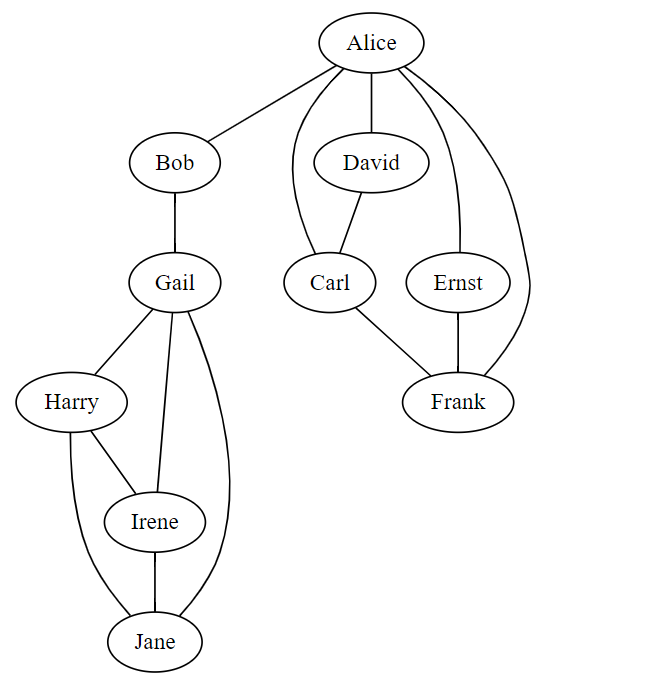

In [70]:
graph3 = Graph(gtype='Weighted')

In [71]:
graph3.addVertex('a')
graph3.getVertices()

[a]

In [72]:
graph3.addVerticesFromList(['a', 'b'])
graph3.getVertices()

[a, a, b]

In [73]:
graph3.addEdge('a', 'b', weight=1/2)
graph3.getEdges()

Possible nodes with given label: [('a', 1), ('a', 2)]. Please select by reference key: 1


[(a, b, 0.5)]

In [74]:
graph3.addEdgesFromList([('a', 'b'), ('b', 'c'), ('b', 'd')], [1/5, 2/5, 2/5])
graph3.getEdges()

Possible nodes with given label: [('a', 1), ('a', 2)]. Please select by reference key: 2


[(a, b, 0.5), (a, b, 0.2), (b, c, 0.4), (b, d, 0.4)]

In [75]:
print(str(graph3))

Please give the name of the graph: graph3
graph graph3 {
	a1 -- b [label=0.5];
	a2 -- b [label=0.2];
	b -- c [label=0.4];
	b -- d [label=0.4];
}


In [61]:
graph3.getVertices()

[a, a, b, c, d]

In [62]:
[3 in graph3, 103 in graph3]

[True, False]

In [63]:
graph3.getNeighbours(3)

[a, a, c, d]

In [64]:
graph3.saveGraph('lab2task1b', 'graph2')

In [65]:
graph3.getShortestPaths(3)

[(b, 0), (a, 1), (a, 1), (c, 1), (d, 1)]

In [66]:
f = open('lab2task1b.txt', 'r')
file_contents = f.read()
print(file_contents)
f.close()

graph graph2 {
	a1 -- b [label=0.5];
	a2 -- b [label=0.2];
	b -- c [label=0.4];
	b -- d [label=0.4];
}


!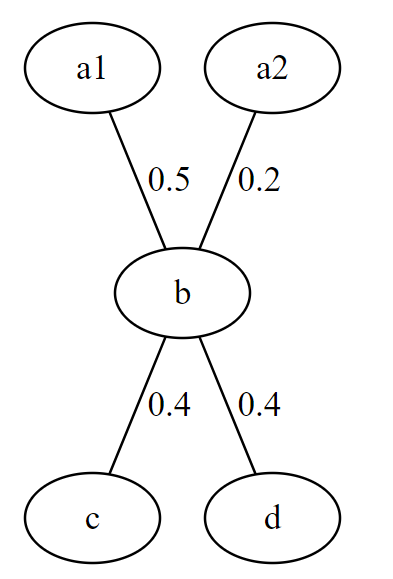